y = 0.55x + 3

In [1]:
import pandas as pd
import numpy as np

In [2]:
def func1(x):
    return 0.55*x + 3

In [3]:
data = {'x': [x for x in range(1, 101)],
        'y': [func1(x) for x in range(1, 101)]}
df = pd.DataFrame(data)
df

,x,y
0,1,3.55
1,2,4.10
2,3,4.65
3,4,5.20
4,5,5.75
...,...,...
95,96,55.80
96,97,56.35
97,98,56.90
98,99,57.45


In [4]:
data = np.array(df['x']).reshape(-1, 1)
target = np.array(df['y']).reshape(-1, 1)

In [5]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [6]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Dense(50, activation='linear', input_dim=1))
model.add(keras.layers.Dense(50, activation='linear', input_dim=1))

model.summary()

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                100       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
Total params: 2,650
Trainable params: 2,650
Non-trainable params: 0
_________________________________________________________________


2023-09-07 11:18:52.239444: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-07 11:18:52.239579: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error', metrics=['mae'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('quiz_best_model.h5', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history= model.fit(train_input, train_target, epochs=300, validation_data=(val_input, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/300


2023-09-07 11:18:52.361057: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-09-07 11:18:52.474519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/2 [==============>...............] - ETA: 0s - loss: 1673.4362 - mae: 34.9022

2023-09-07 11:18:52.634655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 118ms/step - loss: 1443.7065 - mae: 32.2751 - val_loss: 808.6352 - val_mae: 22.6281
Epoch 2/300
2/2 [==============================] - 0s 33ms/step - loss: 732.2084 - mae: 22.2130 - val_loss: 350.8645 - val_mae: 14.1467
Epoch 3/300
2/2 [==============================] - 0s 32ms/step - loss: 287.8254 - mae: 12.9379 - val_loss: 116.0898 - val_mae: 7.6308
Epoch 4/300
2/2 [==============================] - 0s 33ms/step - loss: 101.4413 - mae: 7.3517 - val_loss: 64.6974 - val_mae: 6.1510
Epoch 5/300
2/2 [==============================] - 0s 20ms/step - loss: 78.3442 - mae: 6.7860 - val_loss: 93.6371 - val_mae: 7.1275
Epoch 6/300
2/2 [==============================] - 0s 21ms/step - loss: 106.6107 - mae: 8.0181 - val_loss: 99.3280 - val_mae: 7.7102
Epoch 7/300
2/2 [==============================] - 0s 21ms/step - loss: 99.2716 - mae: 8.0232 - val_loss: 70.3396 - val_mae: 6.4819
Epoch 8/300
2/2 [==============================] - 0s 33ms/step - loss: 6

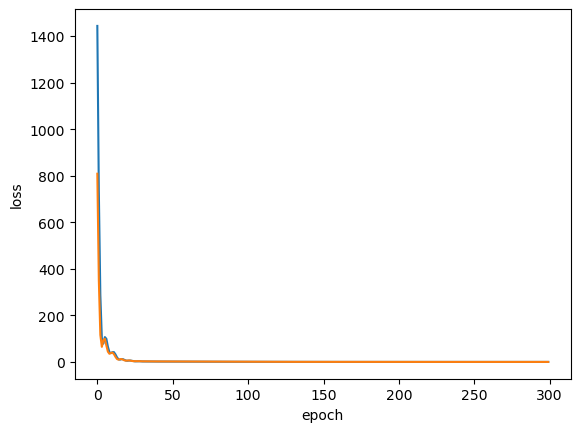

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [9]:
model.evaluate(val_input, val_target)

1/1 [==============================] - 0s 14ms/step - loss: 0.0124 - mae: 0.0788


[0.012367729097604752, 0.07881699502468109]

In [10]:
model.evaluate(test_input, test_target)

1/1 [==============================] - 0s 32ms/step - loss: 0.0112 - mae: 0.0774


[0.011211537756025791, 0.07742522656917572]

In [11]:
model.get_weights()

[array([[-0.11559334, -0.00876668, -0.18168966, -0.03698098,  0.17869513,
         -0.08885773,  0.00546062,  0.08479103, -0.01473973,  0.186826  ,
          0.18927518, -0.08589906, -0.12083373, -0.07106612,  0.04435939,
          0.06796143,  0.06048255, -0.15584485, -0.02664892, -0.10734937,
         -0.02673807,  0.02909631, -0.04931472, -0.18823135,  0.15417525,
          0.1622377 , -0.13105294, -0.12967597, -0.1298759 ,  0.07573295,
         -0.04843432, -0.06740732,  0.00775599,  0.29029453,  0.06969505,
         -0.15055582, -0.06044776,  0.26532975,  0.00576312,  0.2581944 ,
         -0.3254689 ,  0.02584914, -0.16120315, -0.305972  ,  0.13485464,
          0.08537389, -0.13870789, -0.2608599 ,  0.05351935,  0.3296551 ]],
       dtype=float32),
 array([-0.5863636 , -0.5129806 , -0.07125358, -0.7878708 ,  0.6915263 ,
        -0.46097758,  0.5185125 ,  0.49822912, -0.43983936,  0.7786785 ,
         0.7385697 , -0.57865286, -0.08443517, -0.6293876 ,  0.60834664,
         0.55567

In [12]:
model.predict(np.array([[100]]))[0][0]

1/1 [==============================] - 0s 53ms/step


2023-09-07 11:19:04.907364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


58.022774

In [13]:
func1(100)

58.00000000000001